#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [159]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [160]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [161]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [162]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [163]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [164]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [165]:
model = Sequential()

In [166]:
#卷積層1

In [167]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [168]:
model.add(Dropout(rate=0.25))

In [169]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [170]:
#卷積層2與池化層2

In [171]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [172]:
model.add(Dropout(0.25))

In [173]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [174]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [175]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [176]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [177]:
model.add(Dense(10, activation='softmax'))

In [178]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [179]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [180]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [181]:
#模型編譯
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [182]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 13s 350us/step - loss: 1.5453 - accuracy: 0.4456 - val_loss: 1.3676 - val_accuracy: 0.5416
Epoch 2/12
37500/37500 [==============================] - 13s 343us/step - loss: 1.1824 - accuracy: 0.5768 - val_loss: 1.1656 - val_accuracy: 0.6207
Epoch 3/12
37500/37500 [==============================] - 13s 352us/step - loss: 1.0424 - accuracy: 0.6321 - val_loss: 1.0810 - val_accuracy: 0.6434
Epoch 4/12
37500/37500 [==============================] - 13s 348us/step - loss: 0.9245 - accuracy: 0.6733 - val_loss: 0.9807 - val_accuracy: 0.6858
Epoch 5/12
37500/37500 [==============================] - 13s 342us/step - loss: 0.8330 - accuracy: 0.7059 - val_loss: 0.9341 - val_accuracy: 0.6860
Epoch 6/12
37500/37500 [==============================] - 13s 342us/step - loss: 0.7443 - accuracy: 0.7365 - val_loss: 0.8687 - val_accuracy: 0.7148
Epoch 7/12
37500/37500 [==============================] 

In [183]:
以圖形顯示訓練過程



NameError: name '以圖形顯示訓練過程' is not defined

In [184]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

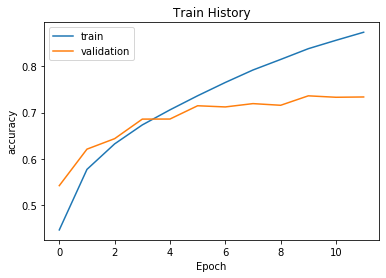

In [185]:
show_train_history(train_history,'accuracy','val_accuracy')

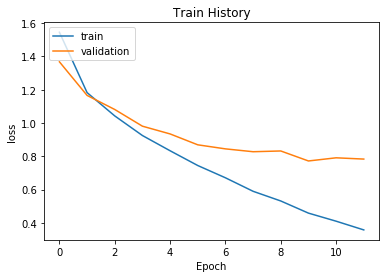

In [186]:
show_train_history(train_history,'loss','val_loss')

In [ ]:
評估模型準確率


In [187]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 169us/step

accuracy= 0.7286999821662903


In [188]:
prediction=model.predict_classes(x_img_test)

In [143]:
prediction

array([3, 1, 8, ..., 5, 1, 7], dtype=int64)

In [189]:
'''MSE'''


'MSE'

In [190]:
from keras import losses
model.compile(loss= 'mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [191]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 12s 310us/step - loss: 0.0137 - accuracy: 0.9098 - val_loss: 0.0356 - val_accuracy: 0.7437
Epoch 2/12
37500/37500 [==============================] - 11s 303us/step - loss: 0.0136 - accuracy: 0.9092 - val_loss: 0.0354 - val_accuracy: 0.7433
Epoch 3/12
37500/37500 [==============================] - 11s 303us/step - loss: 0.0133 - accuracy: 0.9142 - val_loss: 0.0354 - val_accuracy: 0.7434
Epoch 4/12
37500/37500 [==============================] - 11s 302us/step - loss: 0.0133 - accuracy: 0.9133 - val_loss: 0.0355 - val_accuracy: 0.7425
Epoch 5/12
37500/37500 [==============================] - 11s 303us/step - loss: 0.0133 - accuracy: 0.9124 - val_loss: 0.0354 - val_accuracy: 0.7423
Epoch 6/12
37500/37500 [==============================] - 11s 302us/step - loss: 0.0130 - accuracy: 0.9145 - val_loss: 0.0354 - val_accuracy: 0.7446
Epoch 7/12
37500/37500 [==============================] 

In [192]:
以圖形顯示訓練過程

NameError: name '以圖形顯示訓練過程' is not defined

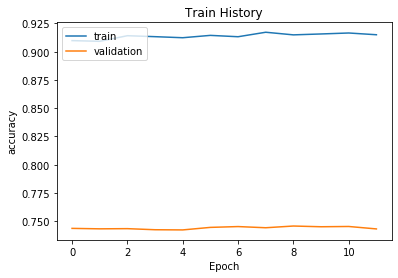

In [193]:
show_train_history(train_history,'accuracy','val_accuracy')

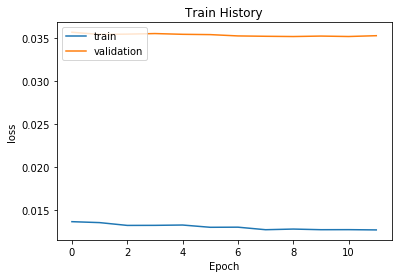

In [194]:
show_train_history(train_history,'loss','val_loss')

In [ ]:
評估模型準確率

In [195]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 156us/step

accuracy= 0.7409999966621399


In [196]:
''''binary _crossentropy'''

"'binary _crossentropy"

In [197]:
model.compile(loss= 'binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [198]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 12s 314us/step - loss: 0.0459 - accuracy: 0.9831 - val_loss: 0.1221 - val_accuracy: 0.9531
Epoch 2/12
37500/37500 [==============================] - 11s 307us/step - loss: 0.0454 - accuracy: 0.9830 - val_loss: 0.1228 - val_accuracy: 0.9528
Epoch 3/12
37500/37500 [==============================] - 11s 306us/step - loss: 0.0458 - accuracy: 0.9829 - val_loss: 0.1214 - val_accuracy: 0.9536
Epoch 4/12
37500/37500 [==============================] - 11s 306us/step - loss: 0.0447 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9530
Epoch 5/12
37500/37500 [==============================] - 11s 306us/step - loss: 0.0438 - accuracy: 0.9838 - val_loss: 0.1223 - val_accuracy: 0.9531
Epoch 6/12
37500/37500 [==============================] - 11s 306us/step - loss: 0.0437 - accuracy: 0.9835 - val_loss: 0.1218 - val_accuracy: 0.9529
Epoch 7/12
37500/37500 [==============================] 

In [199]:
以圖形顯示訓練過程

NameError: name '以圖形顯示訓練過程' is not defined

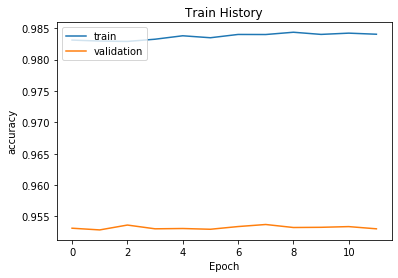

In [200]:
show_train_history(train_history,'accuracy','val_accuracy')

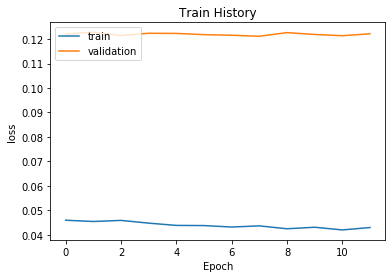

In [201]:
show_train_history(train_history,'loss','val_loss')

In [202]:
評估模型準確率

NameError: name '評估模型準確率' is not defined

In [203]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 157us/step

accuracy= 0.9522498250007629
